# DBSCAN Algorithm
## Dataset: Sales Transactions Dataset Weekly

In [51]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA

In [52]:
#Reading the dataset
data= pd.read_csv('Sales_Transactions_Dataset_Weekly.csv')
data

,Product_Code,W0,W1,W2,W3,W4,W5,W6,W7,W8,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
0,P1,11,12,10,8,13,12,14,21,6,...,8,10,12,3,7,6,5,10,3,21
1,P2,7,6,3,2,7,1,6,3,3,...,5,1,1,4,5,1,6,0,0,10
2,P3,7,11,8,9,10,8,7,13,12,...,5,5,7,8,14,8,8,7,3,14
3,P4,12,8,13,5,9,6,9,13,13,...,3,4,6,8,14,8,7,8,2,19
4,P5,8,5,13,11,6,7,9,14,9,...,7,12,6,6,5,11,8,9,3,18
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
806,P815,0,0,1,0,0,2,1,0,0,...,1,0,0,1,0,0,2,0,0,3
807,P816,0,1,0,0,1,2,2,6,0,...,4,2,4,5,5,5,6,5,0,7
808,P817,1,0,0,0,1,1,2,1,1,...,0,2,2,0,0,0,4,3,0,4
809,P818,0,0,0,1,0,0,0,0,1,...,0,1,1,0,0,0,2,0,0,2


In [53]:
#Dropping the Product_Code column from the dataset
data = data.drop('Product_Code', axis = 1)
  
#Handling the missing values
data.fillna(method ='ffill', inplace = True)

data.head()

,W0,W1,W2,W3,W4,W5,W6,W7,W8,W9,...,W44,W45,W46,W47,W48,W49,W50,W51,MIN,MAX
0,11,12,10,8,13,12,14,21,6,14,...,8,10,12,3,7,6,5,10,3,21
1,7,6,3,2,7,1,6,3,3,3,...,5,1,1,4,5,1,6,0,0,10
2,7,11,8,9,10,8,7,13,12,6,...,5,5,7,8,14,8,8,7,3,14
3,12,8,13,5,9,6,9,13,13,11,...,3,4,6,8,14,8,7,8,2,19
4,8,5,13,11,6,7,9,14,9,9,...,7,12,6,6,5,11,8,9,3,18


In [54]:
#Scaling the data to bring all the attributes to a comparable level
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)
  
#Normalizing the data so that the data approximately follows a Gaussian distribution
data_normalized = normalize(data_scaled)
  
#Converting the numpy array into a pandas DataFrame
data_normalized = pd.DataFrame(data_normalized)
data_normalized.head()

,0,1,2,3,4,5,6,7,8,9,...,44,45,46,47,48,49,50,51,52,53
0,0.077333,0.101646,0.020817,-0.056386,0.116376,0.087918,0.142667,0.389181,-0.124255,0.146236,...,-0.017206,0.056442,0.125567,-0.220626,-0.066383,-0.117731,-0.163756,0.051715,-0.054234,0.121713
1,-0.046224,-0.073020,-0.143600,-0.166941,-0.057637,-0.193558,-0.081711,-0.147960,-0.146783,-0.149106,...,-0.089702,-0.194626,-0.194750,-0.119741,-0.095987,-0.211551,-0.079963,-0.272653,-0.173092,-0.107833
2,-0.083447,0.078792,-0.056380,-0.028024,0.017192,-0.060511,-0.107860,0.138481,0.086547,-0.148325,...,-0.161937,-0.165358,-0.078335,-0.031044,0.251145,-0.043303,-0.043475,-0.104602,-0.064514,-0.071232
3,0.115205,-0.040346,0.124217,-0.156227,-0.019693,-0.121317,-0.024214,0.117435,0.106516,0.045031,...,-0.217305,-0.179659,-0.105049,-0.026326,0.212976,-0.036722,-0.079643,-0.041747,-0.124803,0.070442
4,-0.040828,-0.179398,0.151071,0.051647,-0.148996,-0.104976,-0.029449,0.184654,-0.031591,-0.028331,...,-0.069744,0.165161,-0.127759,-0.127481,-0.178716,0.105007,-0.044838,0.006338,-0.066537,0.053843


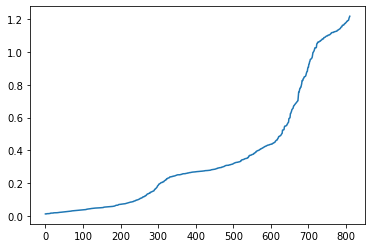

In [55]:
#To determine eps value
from sklearn.neighbors import NearestNeighbors
nearest_neighbors = NearestNeighbors(n_neighbors=2)
n = nearest_neighbors.fit(data_normalized)
distance, indices = n.kneighbors(data_normalized)
distance = np.sort(distance, axis=0)
distance = distance[:,1]
plt.plot(distance)

In [56]:
pca = PCA(n_components = 2)
data_principal = pca.fit_transform(data_normalized)
data_principal = pd.DataFrame(data_principal)
data_principal.columns = ['C1', 'C2']
data_principal.head()

,C1,C2
0,0.548671,-0.310629
1,-0.545399,-0.147385
2,0.275824,-0.160815
3,0.175603,-0.152939
4,0.207461,0.051230


In [57]:
#eps value is 0.2
db_default = DBSCAN(eps = 0.2, min_samples = 10).fit(data_principal)
labels = db_default.labels_

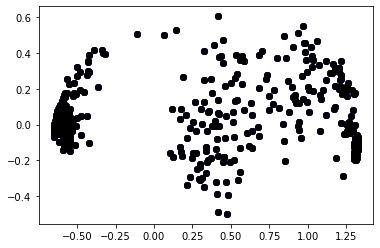

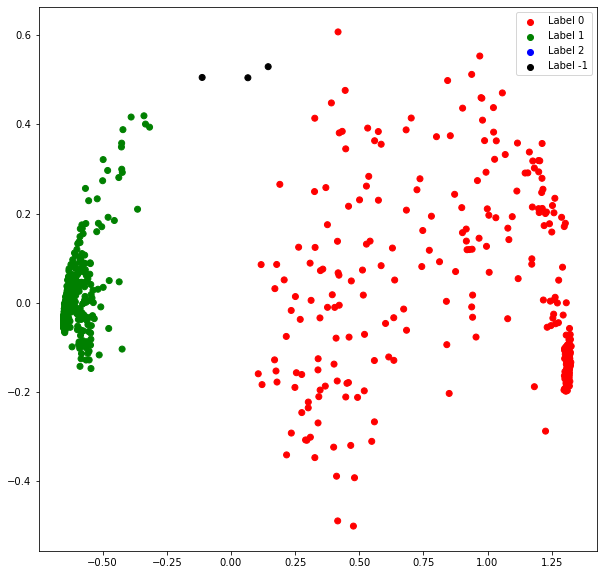

In [58]:
colours = {}
colours[0] = 'r'
colours[1] = 'g'
colours[2] = 'b'
colours[-1] ='k'
  
#Building the colour vector for each data point
colour_vector = [colours[label] for label in labels]
  
#construction of the legend of the plot
r = plt.scatter(data_principal['C1'], data_principal['C2'], color ='r');
g = plt.scatter(data_principal['C1'], data_principal['C2'], color ='g');
b = plt.scatter(data_principal['C1'], data_principal['C2'], color ='b');
k = plt.scatter(data_principal['C1'], data_principal['C2'], color ='k');
  
#Plotting C1 on the X-Axis and C2 on the Y-Axis according to the colour vector defined
plt.figure(figsize =(10, 10))
plt.scatter(data_principal['C1'], data_principal['C2'], c = colour_vector)
  
#Building the legend
plt.legend((r, g, b, k),('Label 0', 'Label 1', 'Label 2', 'Label -1'))
plt.show()

In [59]:
db = DBSCAN(eps = 0.2, min_samples = 50).fit(data_principal)
labels1 = db.labels_

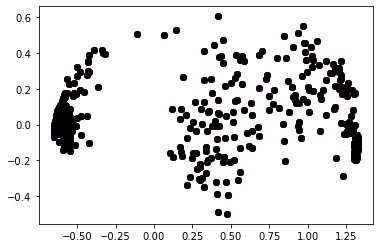

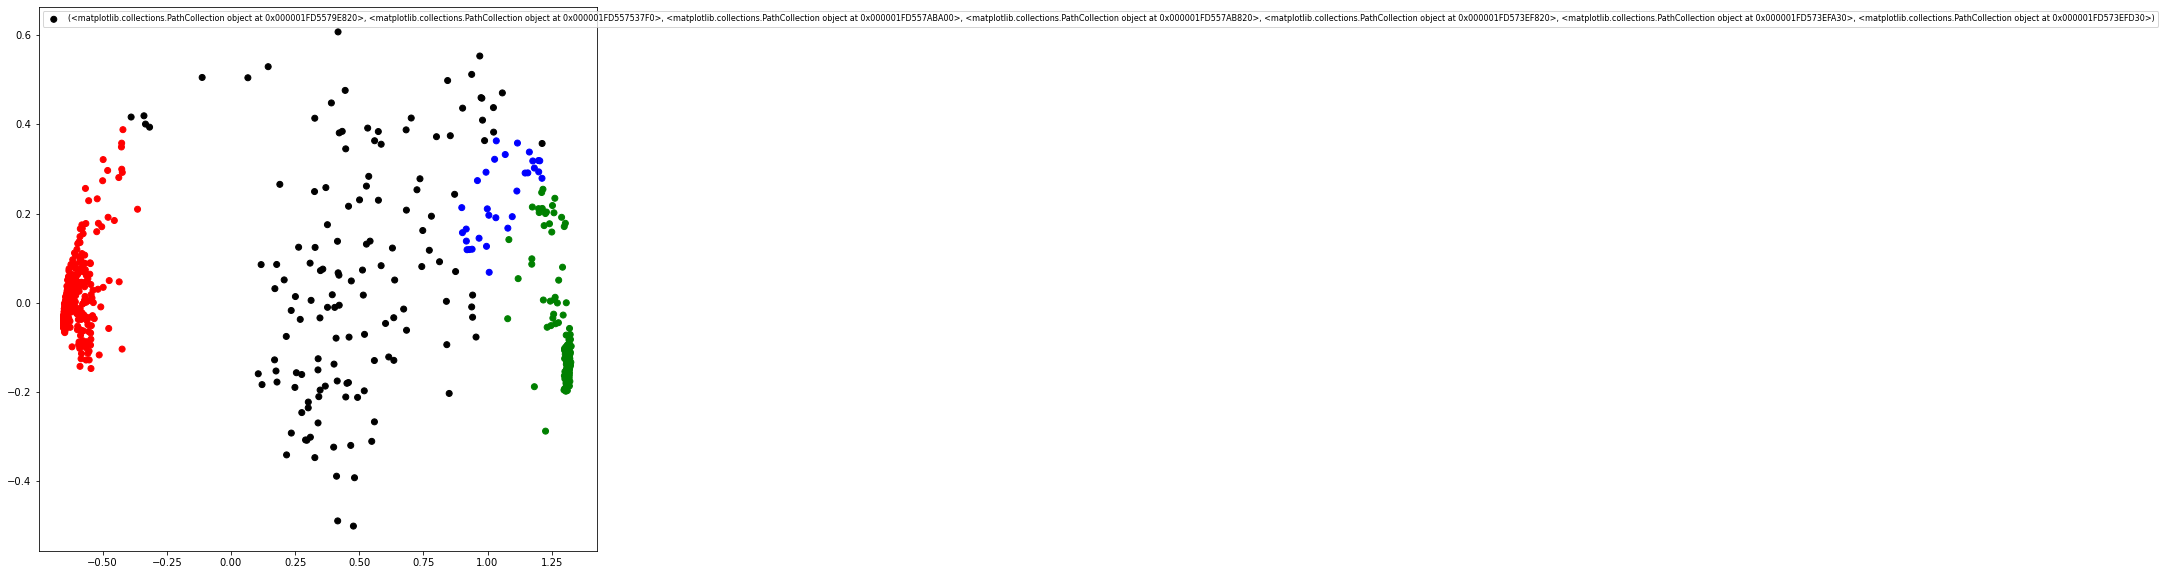

In [60]:
colours1 = {}
colours1[0] = 'r'
colours1[1] = 'g'
colours1[2] = 'b'
colours1[3] = 'c'
colours1[4] = 'y'
colours1[5] = 'm'
colours1[-1] ='k'

#Building the colour vector for each data point
colour_vector1 = [colours1[label] for label in labels1]
colors = ['r', 'g', 'b', 'c', 'y', 'm', 'k' ]

#construction of the legend of the plot
r = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[0])
g = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[1])
b = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[2])
c = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[3])
y = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[4])
m = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[5])
k = plt.scatter(data_principal['C1'], data_principal['C2'], marker ='o', color = colors[6])
  
#Plotting C1 on the X-Axis and C2 on the Y-Axis according to the colour vector defined
plt.figure(figsize =(10, 10))
plt.scatter(data_principal['C1'], data_principal['C2'], c = colour_vector1)

#Building the legend
plt.legend(((r, g, b, c, y, m, k),'Label 0', 'Label 1', 'Label 2', 'Label 3','Label 4','Label 5', 'Label -1'),scatterpoints = 1,
loc ='upper left',ncol = 3,fontsize = 8)
plt.show()